In [1]:
from dask.distributed import Client, progress
client = Client(n_workers=4, threads_per_worker=1)
client

Client Scheduler: tcp://127.0.0.1:43307 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 17.18 GB


In [3]:
pip install mimesis

     |████████████████████████████████| 2.8 MB 4.2 MB/s eta 0:00:01
  Created wheel for mimesis: filename=mimesis-4.1.3-py3-none-any.whl size=2849199 sha256=7b247c1ca5e45fc86daae3a9960d351c9e4825239d5a365925c565572f9508ea
  Stored in directory: /home/jovyan/.cache/pip/wheels/82/1a/70/bb046da3c396a047e34f241924d6fc00c6889d3aa9508f11a3
Successfully built mimesis
Note: you may need to restart the kernel to use updated packages.


In [4]:
import dask
import json
import os

os.makedirs('data', exist_ok=True)              # Create data/ directory

b = dask.datasets.make_people()                 # Make records of people
b.map(json.dumps).to_textfiles('data/*.json') 

['/home/jovyan/gonzag_cloud/data/0.json',
 '/home/jovyan/gonzag_cloud/data/1.json',
 '/home/jovyan/gonzag_cloud/data/2.json',
 '/home/jovyan/gonzag_cloud/data/3.json',
 '/home/jovyan/gonzag_cloud/data/4.json',
 '/home/jovyan/gonzag_cloud/data/5.json',
 '/home/jovyan/gonzag_cloud/data/6.json',
 '/home/jovyan/gonzag_cloud/data/7.json',
 '/home/jovyan/gonzag_cloud/data/8.json',
 '/home/jovyan/gonzag_cloud/data/9.json']

In [5]:
!head -n 2 data/0.json

{"age": 19, "name": ["Blossom", "Parrish"], "occupation": "Project Leader", "telephone": "628-488-8559", "address": {"address": "106 Via Ferlinghetti Gate", "city": "Vestavia Hills"}, "credit-card": {"number": "2496 5743 3075 7775", "expiration-date": "09/25"}}
{"age": 21, "name": ["Glayds", "Hansen"], "occupation": "Sales Executive", "telephone": "1-579-652-5999", "address": {"address": "107 Natoma Stravenue", "city": "Fort Wayne"}, "credit-card": {"number": "2714 0256 7282 1808", "expiration-date": "09/23"}}


In [6]:
import dask.bag as db
import json

b = db.read_text('data/*.json').map(json.loads)
b

dask.bag<loads, npartitions=10>

In [7]:
b.take(2)

({'age': 19,
  'name': ['Blossom', 'Parrish'],
  'occupation': 'Project Leader',
  'telephone': '628-488-8559',
  'address': {'address': '106 Via Ferlinghetti Gate',
   'city': 'Vestavia Hills'},
  'credit-card': {'number': '2496 5743 3075 7775',
   'expiration-date': '09/25'}},
 {'age': 21,
  'name': ['Glayds', 'Hansen'],
  'occupation': 'Sales Executive',
  'telephone': '1-579-652-5999',
  'address': {'address': '107 Natoma Stravenue', 'city': 'Fort Wayne'},
  'credit-card': {'number': '2714 0256 7282 1808',
   'expiration-date': '09/23'}})

In [8]:
b.filter(lambda record: record['age'] > 30).take(2)

({'age': 34,
  'name': ['Kermit', 'Sears'],
  'occupation': 'Car Park Attendant',
  'telephone': '1-201-326-3787',
  'address': {'address': '1366 Gibb Highway', 'city': 'Bayonne'},
  'credit-card': {'number': '4286 9344 9751 7968',
   'expiration-date': '05/16'}},
 {'age': 33,
  'name': ['Yolando', 'Schneider'],
  'occupation': 'Premises',
  'telephone': '1-833-212-0085',
  'address': {'address': '1023 Morning Glory Run', 'city': 'Woodridge'},
  'credit-card': {'number': '3474 405831 64181', 'expiration-date': '10/21'}})

In [9]:
b.map(lambda record: record['occupation']).take(2) 

('Project Leader', 'Sales Executive')

In [10]:
b.count().compute()

10000

In [11]:
result = (b.filter(lambda record: record['age'] > 30)
           .map(lambda record: record['occupation'])
           .frequencies(sort=True)
           .topk(10, key=1))
result

dask.bag<topk-aggregate, npartitions=1>

In [12]:
result.compute()

[('Polisher', 17),
 ('Steel Erector', 16),
 ('Software Consultant', 14),
 ('Carpet Fitter', 14),
 ('Picture Framer', 14),
 ('Cellarman', 13),
 ('Magician', 13),
 ('Glass Worker', 13),
 ('Rally Driver', 13),
 ('Instrument Technician', 13)]

In [13]:
def inc(x):
    return x + 1

def double(x):
    return x * 2

def add(x, y):
    return x + y

data = [1, 2, 3, 4, 5]

output = []
for x in data:
    a = inc(x)
    b = double(x)
    c = add(a, b)
    output.append(c)

total = sum(output)


In [14]:
import dask

output = []
for x in data:
    a = dask.delayed(inc)(x)
    b = dask.delayed(double)(x)
    c = dask.delayed(add)(a, b)
    output.append(c)

total = dask.delayed(sum)(output)


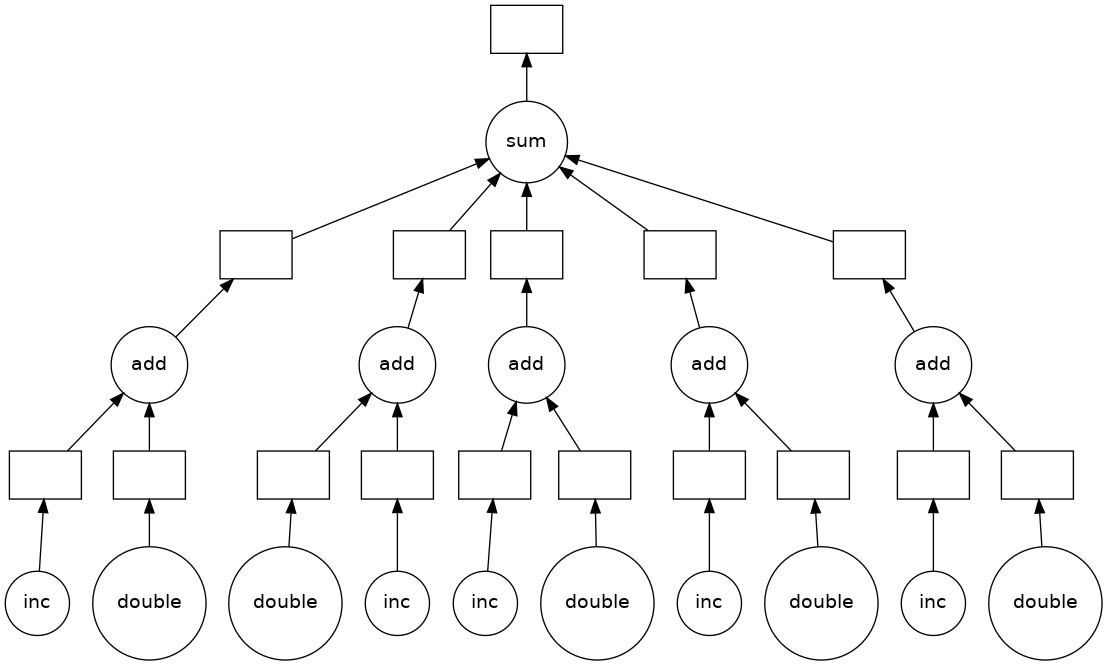

In [15]:
total.visualize()

In [16]:
total.compute()

50

In [17]:
import dask

@dask.delayed
def inc(x):
    return x + 1

@dask.delayed
def double(x):
    return x * 2

@dask.delayed
def add(x, y):
    return x + y

data = [1, 2, 3, 4, 5]

output = []
for x in data:
    a = inc(x)
    b = double(x)
    c = add(a, b)
    output.append(c)

total = dask.delayed(sum)(output)


In [18]:
from dask.distributed import Client

client = Client()  # start local workers as processes


/srv/conda/envs/notebook/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46635 instead
  warnings.warn(


In [19]:
def inc(x):
    return x + 1

def add(x, y):
    return x + y

a = client.submit(inc, 10)  # calls inc(10) in background thread or process
b = client.submit(inc, 20)  # calls inc(20) in background thread or process


In [20]:
a.result()

11

In [21]:
c = client.submit(add, a, b)

In [22]:
futures = client.map(inc, range(1000))

In [23]:
results = client.gather(futures)